In [1]:
# Importing Pandas,NumPy and ploting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Supress warning
import warnings
warnings.filterwarnings('ignore')

In [8]:
pd.set_option('display.max_columns',None)
%matplotlib inline

In [11]:
# Read the data
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [12]:
df.shape

(9240, 37)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [14]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Handling Missing Values

Finding the categorical variables having a level called 'Select', which needs to be handled because it is as good as a null value.

In [17]:
# Finding the columns having "Select" values
for cols in df.columns:
    if 'Select' in list(df[cols]):
        print(cols)

Specialization
How did you hear about X Education
Lead Profile
City


In [18]:
# Replacing "Select" value as Null in the above column
df['Specialization'].replace({'Select':None}, inplace=True)
df['How did you hear about X Education'].replace({'Select':None}, inplace=True)
df['Lead Profile'].replace({'Select':None}, inplace=True)
df['City'].replace({'Select':None}, inplace=True)

### Treating Missing Values in columns

In [19]:
# Cheking percent of missing values in columns 
(round(100*(df.isnull().sum()/len(df.index)),2)).to_frame('nulls').sort_values('nulls', ascending=False)

,nulls
How did you hear about X Education,78.46
Lead Profile,74.19
Lead Quality,51.59
Asymmetrique Profile Score,45.65
Asymmetrique Activity Score,45.65
Asymmetrique Activity Index,45.65
Asymmetrique Profile Index,45.65
City,39.71
Specialization,36.58
Tags,36.29


We can see that there are high number of missing values in few coulmns such as How did you hear about X Education, Lead profile, Lead Quality etc.

In [20]:
# List the columns having more than 25% missing values
cols_25_percent_missing_values = (df.columns[(round(100*(df.isnull().sum()/len(df.index)), 2)) >= 25]).tolist()
cols_25_percent_missing_values

['Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [21]:
# Delete the columns having more than 25% missing values
df = df.drop(cols_25_percent_missing_values,axis=1)

In [22]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### Treating Missing Values in Rows

In [23]:
# Count the number of rows having more than 50% missing values
len(df[df.isnull().sum(axis=1) > (len(df.columns)//2)].index)

0

As there are none of the rows, so we are not deleting rows on basis of rows having more than 50% missing values.

In [24]:
# Cheking percent of missing values in columns agian
(round(100*(df.isnull().sum()/len(df.index)),2)).to_frame('nulls').sort_values('nulls', ascending=False)

,nulls
TotalVisits,1.48
Page Views Per Visit,1.48
Last Activity,1.11
Lead Source,0.39
Prospect ID,0.00
X Education Forums,0.00
A free copy of Mastering The Interview,0.00
I agree to pay the amount through cheque,0.00
Get updates on DM Content,0.00
Update me on Supply Chain Content,0.00


In [25]:
# Deleting the rows, where TotalVisits column is null
df = df[~np.isnan(df['TotalVisits'])]

In [26]:
# Lets again check the percent of missing values in columns 
(round(100*(df.isnull().sum()/len(df.index)),2)).to_frame('nulls').sort_values('nulls', ascending=False)


,nulls
Lead Source,0.32
Prospect ID,0.00
Newspaper Article,0.00
A free copy of Mastering The Interview,0.00
I agree to pay the amount through cheque,0.00
Get updates on DM Content,0.00
Update me on Supply Chain Content,0.00
Receive More Updates About Our Courses,0.00
Through Recommendations,0.00
Digital Advertisement,0.00


In [27]:
# Deleting the rows, where Lead Source column is null
df = df[~pd.isnull(df['Lead Source'])]

In [28]:
# Lets again check the percent of missing values in columns 
(round(100*(df.isnull().sum()/len(df.index)),2)).to_frame('nulls').sort_values('nulls', ascending=False)

,nulls
Prospect ID,0.0
Lead Number,0.0
A free copy of Mastering The Interview,0.0
I agree to pay the amount through cheque,0.0
Get updates on DM Content,0.0
Update me on Supply Chain Content,0.0
Receive More Updates About Our Courses,0.0
Through Recommendations,0.0
Digital Advertisement,0.0
Newspaper,0.0


In [29]:
df.shape

(9074, 24)

In [30]:
# Number of rows lost
9240-len(df.index)

166

In [31]:
# Percentage of rows lost
(100 - 100*(len(df.index)/9240))

1.7965367965367989

We just have lost 1.8% rows in the entire data cleaning process.

### Outliers treatment

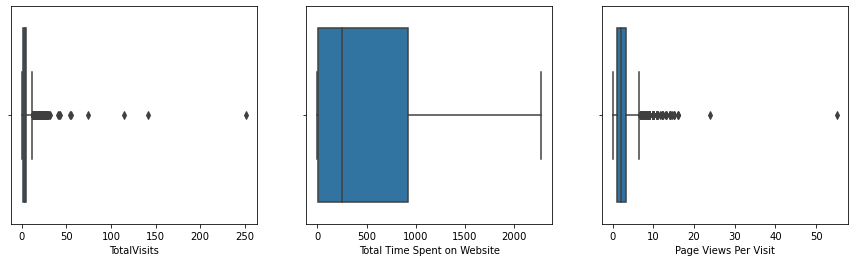

In [32]:
# Checking outliers
plt.figure(figsize=(15,4))
var = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
for i in enumerate(var):
    plt.subplot(1,3,i[0]+1)
    sns.boxplot(x=i[1], data=df)

We can see that there are few outliers in "TotalVisits" and "Page Views Per Visit" columns. There are no outliers in "Total Time Spent on Website". Lets remove the outliers of those columns.

We are removing the outliers in 10th and 90th percentile.

In [33]:
# Finding outliers in 'TotalVisits' and 'Page Views Per Visit' columns with 1.5 IQR rule and removing the outlier records 
col_list_outlier = ['TotalVisits','Page Views Per Visit']
for col in col_list_outlier: 
    q1 = df[col].quantile(0.10)
    q3 = df[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    df = df.loc[(df[col] > range_low) & (df[col] < range_high)]

df.shape

(8970, 24)

In [34]:
# Numbe rof rows lost
9240-len(df.index)

270

In [35]:
# Percentage of rows lost
(100 - 100*(len(df.index)/9240))

2.922077922077932

We just have lost 2.9% rows in the outlier treatment process. At the same time we got rid of the outliers for fair analysis of the data.

#### Average Total Time Spent on Website of the converted and not converted customers

In [36]:
# Converted time spent on website in hours
df_converted_avg_time_spent = df[df['Converted']==1]
Converted_time_spent = round((sum(df_converted_avg_time_spent['Total Time Spent on Website'])/len(df_converted_avg_time_spent.index))/60)
print("Converted_time_spent-",Converted_time_spent)

# Not Converted time spent on website in hours
df_not_converted_avg_time_spent = df[df['Converted']==0]
Not_Converted_time_spent = round((sum(df_not_converted_avg_time_spent['Total Time Spent on Website'])/len(df_not_converted_avg_time_spent.index))/60)
print("Not_Converted_time_spent-",Not_Converted_time_spent)

Converted_time_spent- 12
Not_Converted_time_spent- 5


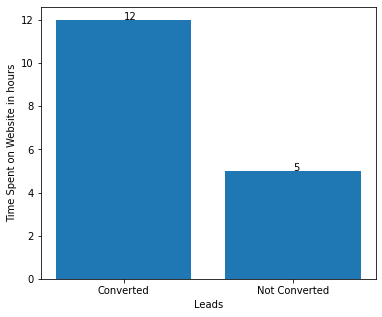

In [37]:
# Plotting
plt.figure(figsize=(6,5))
plt.bar(['Converted', 'Not Converted'], [Converted_time_spent, Not_Converted_time_spent])
plt.annotate(Converted_time_spent, xy=('Converted',Converted_time_spent))
plt.annotate(Not_Converted_time_spent, xy=('Not Converted',Not_Converted_time_spent))
plt.xlabel('Leads')
plt.ylabel('Time Spent on Website in hours')
plt.show()

### Average TotalVisits of the converted and not converted customers

In [38]:
# Converted TotalVisits
df_converted_TotalVisits = df[df['Converted']==1]
Converted_TotalVisits = round(sum(df_converted_TotalVisits['TotalVisits'])/len(df_converted_TotalVisits.index),2)
print("Converted_TotalVisits-",Converted_TotalVisits)

# Not Converted TotalVisits
df_not_converted_TotalVisits = df[df['Converted']==0]
Not_Converted_TotalVisits = round(sum(df_not_converted_TotalVisits['TotalVisits'])/len(df_not_converted_TotalVisits.index),2)
print("Not_Converted_TotalVisits-",Not_Converted_TotalVisits)

Converted_TotalVisits- 3.38
Not_Converted_TotalVisits- 3.08


In [39]:
# Converted TotalVisits
df_converted_TotalVisits = df[df['Converted']==1]
Converted_TotalVisits = round(sum(df_converted_TotalVisits['TotalVisits'])/len(df_converted_TotalVisits.index),2)
print("Converted_TotalVisits-",Converted_TotalVisits)

# Not Converted TotalVisits
df_not_converted_TotalVisits = df[df['Converted']==0]
Not_Converted_TotalVisits = round(sum(df_not_converted_TotalVisits['TotalVisits'])/len(df_not_converted_TotalVisits.index),2)
print("Not_Converted_TotalVisits-",Not_Converted_TotalVisits)

Converted_TotalVisits- 3.38
Not_Converted_TotalVisits- 3.08


We can see that there is not much difference of the Converted and Not-Converted customers based on their total number of visits on the website.

#### Average Page Views Per Visit of the converted and not converted customers

In [40]:
# Converted Page Views Per Visit
df_converted_page_views = df[df['Converted']==1]
Converted_page_views = round(sum(df_converted_page_views['Page Views Per Visit'])/len(df_converted_page_views.index),2)
print("Converted_page_views-",Converted_page_views)

# Not Converted Page Views Per Visit
df_not_converted_page_views = df[df['Converted']==0]
Not_Converted_page_views = round(sum(df_not_converted_page_views['Page Views Per Visit'])/len(df_not_converted_page_views.index),2)
print("Not_Converted_page_views-",Not_Converted_page_views)

Converted_page_views- 2.32
Not_Converted_page_views- 2.31


## Step-2 :- Preparing the data for modeling

### Checking Data Imbalance
Checking the value counts of the categorical columns

In [41]:
df['Lead Origin'].value_counts()

Landing Page Submission    4802
API                        3558
Lead Add Form               580
Lead Import                  30
Name: Lead Origin, dtype: int64

In [42]:
df['Lead Source'].value_counts()

Google               2846
Direct Traffic       2507
Olark Chat           1751
Organic Search       1116
Reference             442
Welingak Website      129
Referral Sites        120
Facebook               31
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
welearnblog_Home        1
youtubechannel          1
Pay per Click Ads       1
testone                 1
NC_EDM                  1
WeLearn                 1
blog                    1
Name: Lead Source, dtype: int64

In [43]:
# We see that "Google" and "google" considers a different values.
# Renaming "google" to "Google"
df['Lead Source'] = df['Lead Source'].replace('google', 'Google')

We can also see in the Lead Source column that few values such as testone, youtubechannel etc are in very low in counts. Even Facebook has very low counts compared to other sources.

We are combining these unique values to a name called Other.

In [44]:
# Combining the lower counts in "Other"

df = df.replace({'Lead Source': {'Facebook':'Other', 'bing':'Other', 'Click2call':'Other', 'Live Chat':'Other',
                                          'Social Media':'Other', 'Press_Release':'Other', 'Pay per Click Ads':'Other',
                                          'WeLearn':'Other', 'WeLearn':'Other', 'youtubechannel':'Other', 'NC_EDM':'Other',
                                          'blog':'Other', 'testone':'Other', 'welearnblog_Home':'Other'}})


In [45]:
# Lets check the count again for Lead Scource
df['Lead Source'].value_counts()

Google              2851
Direct Traffic      2507
Olark Chat          1751
Organic Search      1116
Reference            442
Welingak Website     129
Referral Sites       120
Other                 54
Name: Lead Source, dtype: int64

In [46]:
df['Do Not Email'].value_counts()

No     8274
Yes     696
Name: Do Not Email, dtype: int64

In [47]:
df['Do Not Call'].value_counts()

No     8968
Yes       2
Name: Do Not Call, dtype: int64

In [48]:
df['Last Activity'].value_counts()

Email Opened                    3401
SMS Sent                        2695
Olark Chat Conversation          968
Page Visited on Website          600
Converted to Lead                428
Email Bounced                    311
Email Link Clicked               266
Form Submitted on Website        114
Unreachable                       88
Unsubscribed                      59
Had a Phone Conversation          24
View in browser link Clicked       5
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

We can also see in the Last Activity column that few values such as Resubscribed to emails are in very low in counts.

We are combining these unique values to a name called Other.

In [49]:
# Combining the lower counts in "Other"
df = df.replace({'Last Activity':{'Had a Phone Conversation':'Other', 'View in browser link Clicked':'Other',
                                 'Approached upfront':'Other', 'Email Received':'Other', 'Email Marked Spam':'Other',
                                 'Visited Booth in Tradeshow':'Other', 'Resubscribed to emails':'Other'}})


In [50]:
df['Last Activity'].value_counts()

Email Opened                 3401
SMS Sent                     2695
Olark Chat Conversation       968
Page Visited on Website       600
Converted to Lead             428
Email Bounced                 311
Email Link Clicked            266
Form Submitted on Website     114
Unreachable                    88
Unsubscribed                   59
Other                          40
Name: Last Activity, dtype: int64

In [51]:
df['Search'].value_counts()

No     8957
Yes      13
Name: Search, dtype: int64

In [52]:
df['Magazine'].value_counts()

No    8970
Name: Magazine, dtype: int64

In [53]:
df['Newspaper Article'].value_counts()

No     8969
Yes       1
Name: Newspaper Article, dtype: int64

In [54]:
df['X Education Forums'].value_counts()

No    8970
Name: X Education Forums, dtype: int64

In [55]:
df['Newspaper'].value_counts()

No     8969
Yes       1
Name: Newspaper, dtype: int64

In [56]:
df['Digital Advertisement'].value_counts()

No     8967
Yes       3
Name: Digital Advertisement, dtype: int64

In [57]:
df['Through Recommendations'].value_counts()

No     8964
Yes       6
Name: Through Recommendations, dtype: int64

In [58]:
df['Receive More Updates About Our Courses'].value_counts()

No    8970
Name: Receive More Updates About Our Courses, dtype: int64

In [59]:
df['Update me on Supply Chain Content'].value_counts()

No    8970
Name: Update me on Supply Chain Content, dtype: int64

In [60]:
df['Get updates on DM Content'].value_counts()

No    8970
Name: Get updates on DM Content, dtype: int64

In [61]:
df['I agree to pay the amount through cheque'].value_counts()

No    8970
Name: I agree to pay the amount through cheque, dtype: int64

In [62]:
df['A free copy of Mastering The Interview'].value_counts()

No     6146
Yes    2824
Name: A free copy of Mastering The Interview, dtype: int64

In [63]:
df['Last Notable Activity'].value_counts()

Modified                        3240
Email Opened                    2796
SMS Sent                        2135
Page Visited on Website          289
Olark Chat Conversation          182
Email Link Clicked               172
Email Bounced                     59
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          13
Email Marked Spam                  2
Resubscribed to emails             1
Email Received                     1
Approached upfront                 1
Form Submitted on Website          1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64

In [64]:
# # Combining the lower counts in "Other"
df = df.replace({'Last Notable Activity':{'Unreachable':'Other', 'Had a Phone Conversation':'Other', 'Email Marked Spam':'Other',
                                         'View in browser link Clicked':'Other','Email Received':'Other',
                                         'Approached upfront':'Other','Resubscribed to emails':'Other',
                                         'Resubscribed to emails':'Other','Form Submitted on Website':'Other'}})


In [65]:
# lets check the count again
df['Last Notable Activity'].value_counts()

Modified                   3240
Email Opened               2796
SMS Sent                   2135
Page Visited on Website     289
Olark Chat Conversation     182
Email Link Clicked          172
Email Bounced                59
Other                        52
Unsubscribed                 45
Name: Last Notable Activity, dtype: int64

#### Dropping few coulms having only one type of values

We can that in the below coulmns the Yes count is either very low (almost negligible) or there is no "Yes" value. So, we can remove these columns as there is no role playing by these columns to build our analysis and model.

In [66]:
df = df.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
             'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
             'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque' ], axis=1)

In [67]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,No,Modified


#### Converting some binary variables (Yes/No) to 1/0

In [68]:
varlist = ['Do Not Email', 'A free copy of Mastering The Interview']

def binary_map(x):
    return x.map({'Yes':1, 'No':0})

df[varlist] = df[varlist].apply(binary_map)

In [69]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,0,Modified


### For categorical variables with multiple levels, create dummy features

Creating the dummy variables for the categorical variables with multiple levels.

Dropping the dummy column, which has very low number of values.

For few of the coulmns the "Other" values are low in numbers, so drppoing the "Other" dummy column.

In [70]:
# Creating dummy variables for the categorical variables and dropping the level with low numbe of occurance.

# Creating dummy variables for the variable 'Lead Origin'
lo = pd.get_dummies(df['Lead Origin'], prefix='Lead Origin')
# Dropping Lead Origin_Lead Import column
lo = lo.drop('Lead Origin_Lead Import', axis=1)
# Adding the result to the master df
df = pd.concat([df, lo], axis=1)


# Creating dummy variables for the variable 'Lead Source'
ls = pd.get_dummies(df['Lead Source'], prefix='Lead Source')
# Dropping Lead Source_Other dummy column
ls = ls.drop('Lead Source_Other', axis=1)
# Adding the result to the master df
df = pd.concat([df, ls], axis=1)

# Creating dummy variables for the variable 'Last Activity'
la = pd.get_dummies(df['Last Activity'], prefix='Last Activity')
# Dropping Last Activity_Other dummy column
la = la.drop('Last Activity_Other', axis=1)
# Adding the result to the master df
df = pd.concat([df, la], axis=1)


# Creating dummy variables for the variable 'Last Notable Activity'
ln = pd.get_dummies(df['Last Notable Activity'], prefix='Last Notable Activity')
# Dropping Last Notable Activity_Other dummy column
ln = ln.drop('Last Notable Activity_Other', axis=1)
# Adding the result to the master df
df = pd.concat([df, ln], axis=1)

In [71]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,0,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,0,Email Opened,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,1,Email Opened,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,0,Modified,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,0,Modified,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


#### Dropping the original repeated variables

In [72]:
# We have created dummies for the below variables, so we can drop them
df = df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity'], axis=1)

In [73]:
df.shape

(8970, 36)

##### Checking how many are converted in the dataset

In [74]:
df['Converted'].value_counts()

0    5579
1    3391
Name: Converted, dtype: int64

Text(0, 0.5, 'Count')

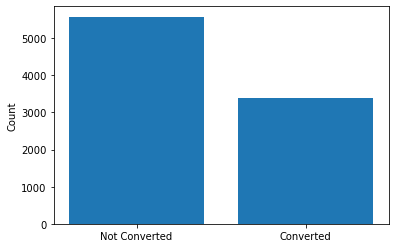

In [75]:
plt.bar(['Not Converted', 'Converted'], [df['Converted'].value_counts()[0], df['Converted'].value_counts()[1]])
plt.ylabel('Count')

In [76]:
# Checking the converted rate
round(((sum(df['Converted'])/len(df.index))*100),2)

37.8

We see that there is a balanced converted and non converted ratio in the dataset. Around 38% customers are converted.

### Test-Train Split

In [77]:
# Import library
from sklearn.model_selection import train_test_split

In [78]:
# Putting feature variables to X
X = df.drop(['Prospect ID', 'Lead Number', 'Converted'], axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
0,0,0.0,0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,0,2.0,1428,1.0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [79]:
# Putting target variable to y
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [80]:
# Splitting data into train and test set with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


#### Feature Scaling

In [81]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [82]:
# Instantiate the scaler
scaler = StandardScaler()
# Sclaing only the numeric variables. We don't need to scale the binary variables as they are already scaled into 0 and 1
# Fit the data into scaler and transform
X_train[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
3825,0,-1.086657,-0.885830,-1.155787,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3307,0,0.285997,1.481982,0.848717,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
5527,0,-1.086657,-0.885830,-1.155787,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
5180,0,-1.086657,-0.885830,-1.155787,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
7064,0,1.315488,1.410174,2.352095,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


#### Looking at Correlations

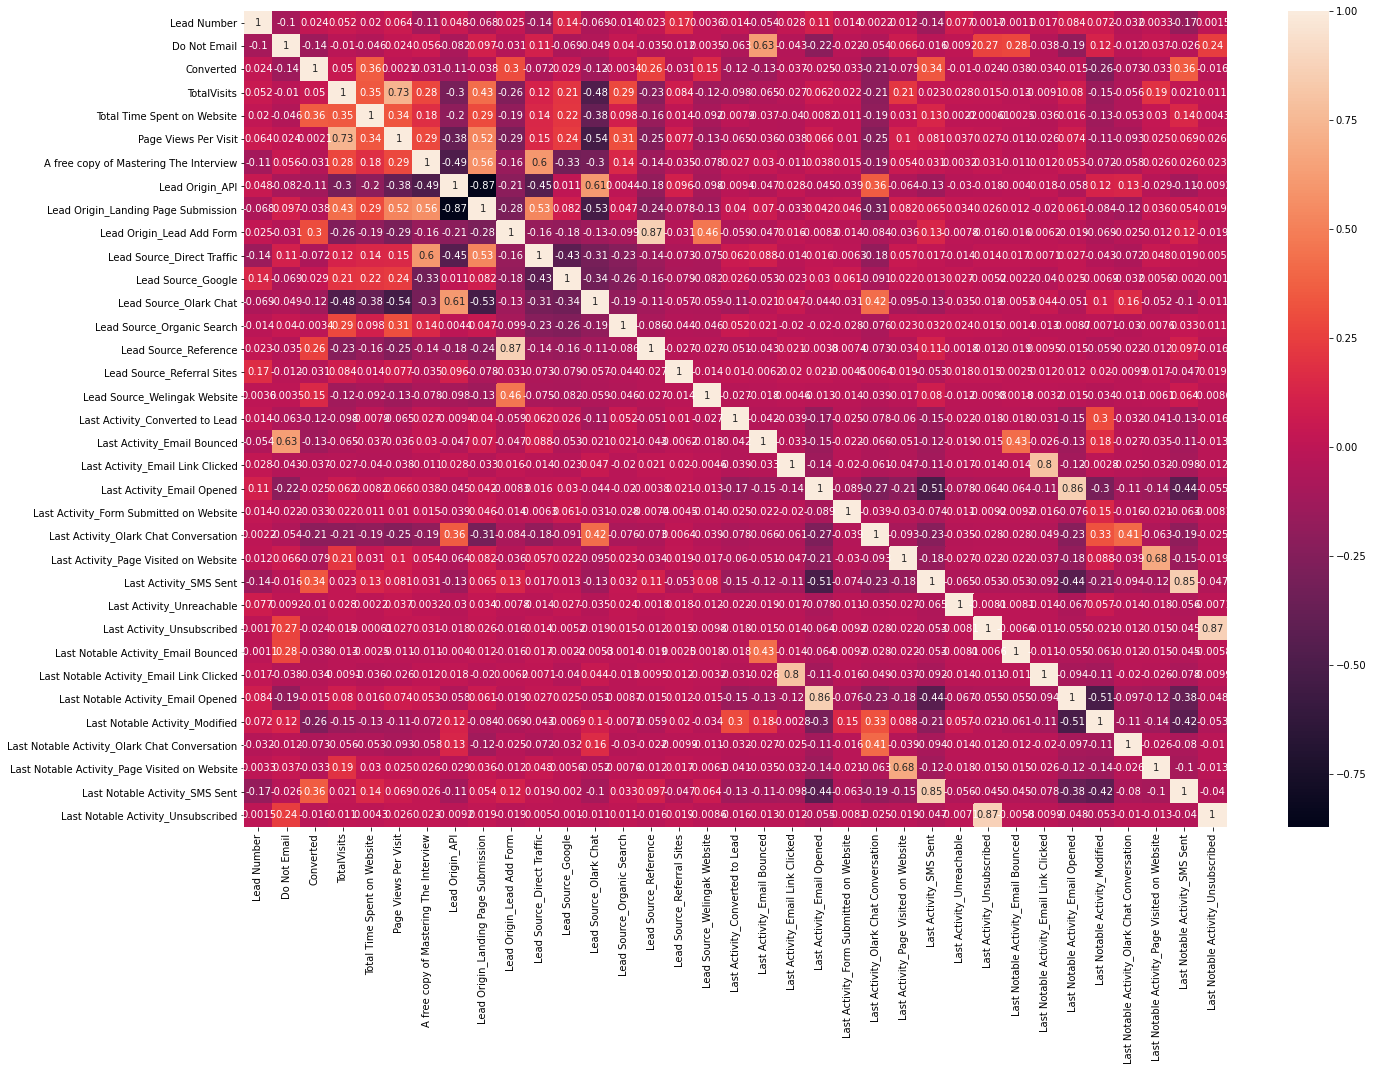

In [84]:
plt.figure(figsize=(22,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

Highly correlated dummy variables

Last Notable Activity_Email Link Clicked and Last Activity_Email Link Clicked correlation = 0.8

Last Notable Activity_Email Opened and Last Activity_Email Opened correlation = 0.86

Last Notable Activity_Page Visited on Website and Last Activity_Page Visited on Website = 0.68

Last Notable Activity_SMS Sent and Last Activity_SMS Sent correlation = 0.85

Last Notable Activity_Unsubscribed and Last Activity_Unsubscribed correlation = 0.87

Last Notable Activity_Olark Chat Conversation and Last Activity_Olark Chat Conversation correlation = 0.41

Last Notable Activity_Email Bounced and Last Activity_Email Bounced correlation = 0.43

Lead Origin_API and Lead Origin_Landing Page Submission correlation = -0.87

Lead Origin_API and Lead Source_Olark Chat correlation = 0.61

Lead Origin_Lead Add Form and Lead Source_Reference correlation = 0.87

In [85]:
# Dropping from train set
X_train = X_train.drop(['Last Notable Activity_Email Link Clicked', 'Last Notable Activity_Email Opened', 'Last Notable Activity_Page Visited on Website',
                       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unsubscribed',
                       'Lead Origin_API', 'Lead Origin_Lead Add Form'], axis=1)

# Dropping from test set
X_test = X_test.drop(['Last Notable Activity_Email Link Clicked', 'Last Notable Activity_Email Opened', 'Last Notable Activity_Page Visited on Website',
                       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unsubscribed', 
                        'Lead Origin_API', 'Lead Origin_Lead Add Form'], axis=1)

In [86]:
X_train.shape

(6279, 26)

In [87]:
X_test.shape

(2691, 26)

Lets check the correlation again

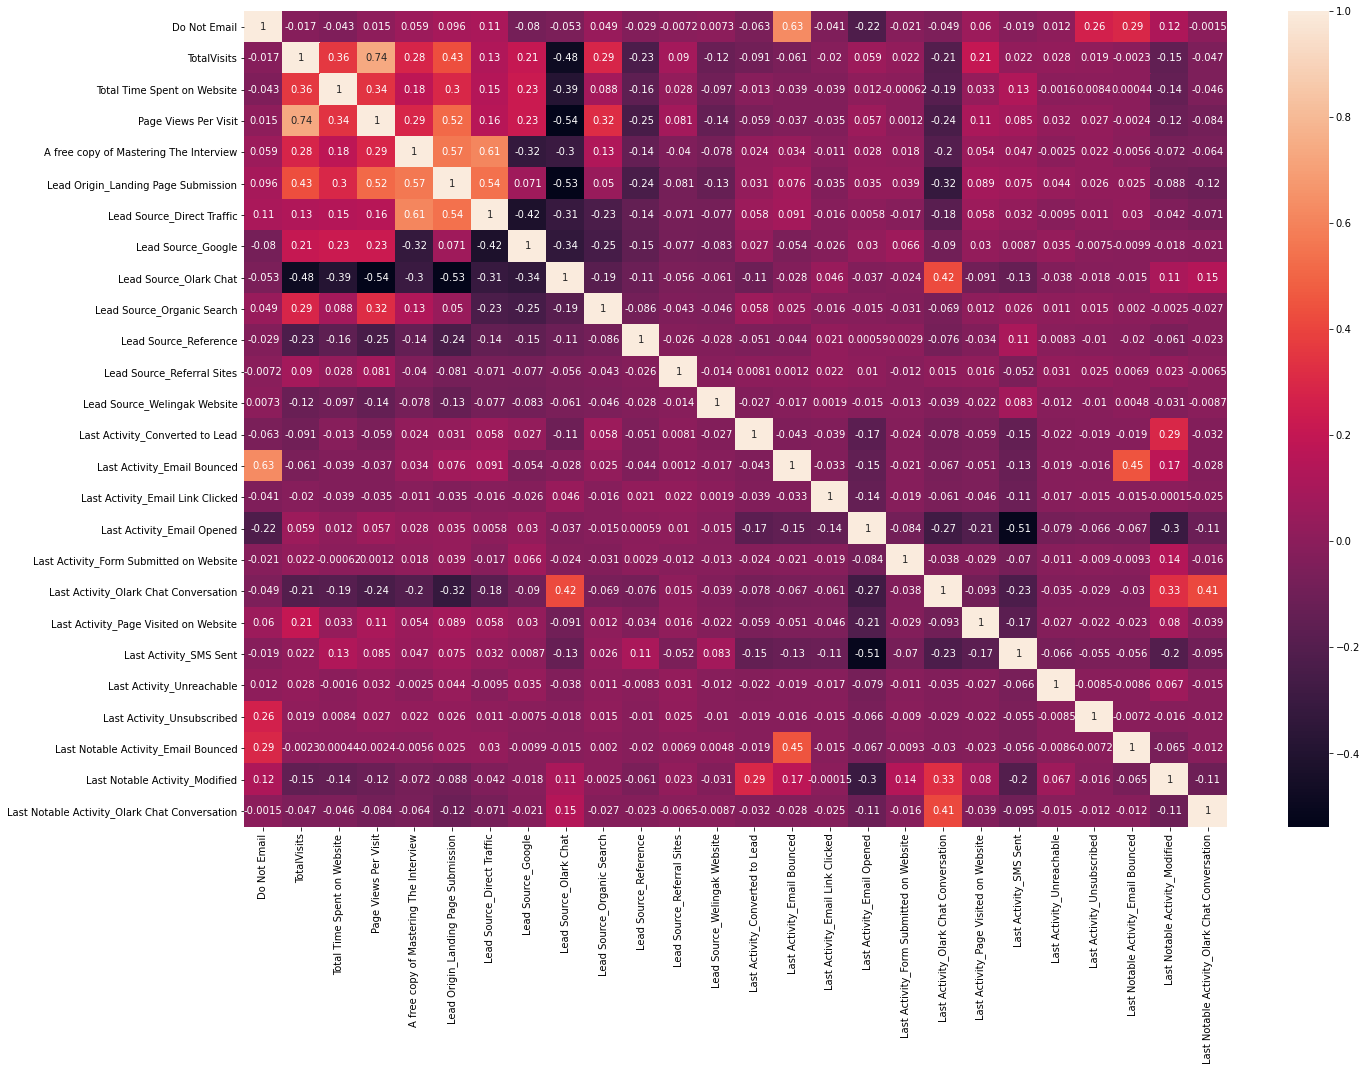

In [88]:
plt.figure(figsize=(22,15))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

### Step-3:- Building the model

In [89]:
# Import statsmodel
import statsmodels.api as sm

In [90]:
# Instantiate the model
logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
# Fit the model
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6279
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2772.9
Date:                Fri, 10 Dec 2021   Deviance:                       5545.7
Time:                        23:20:32   Pearson chi2:                 6.47e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             1.9023      0.566      3.358      0.001       0.792       3.013
Do Not Email                                     -1.2136      0.205     -5.933      0.000      -1.614      -0.813
TotalVisits                                       0.2423      0.051      4.792      0.000       0.143       0.341
Total Time Spent on Website                       1.1147      0.039     28.257      0.000       1.037       1.192
Page Views Per Visit                             -0.1884      0.054     -3.512      0.000      -0.294      -0.083
A free copy of Mastering The Interview            0.0260      0.103      0.253      0.800      -0.175       0.227
Lead Origin_Landing Page Submission              -0.1273      0.103     -1.240      0.215      -0.328       0.074
Lead Source_Direct Traffic                       -1.0494      0.375     -2.802      0.005      -1.783      -0.315
Lead Source_Google                               -0.6702      0.367     -1.828      0.068      -1.389       0.048
Lead Source_Olark Chat                            0.2281      0.367      0.622      0.534      -0.491       0.947
Lead Source_Organic Search                       -0.8546      0.378     -2.259      0.024      -1.596      -0.113
Lead Source_Reference                             3.4407      0.425      8.103      0.000       2.608       4.273
Lead Source_Referral Sites                       -1.0424      0.473     -2.203      0.028      -1.970      -0.115
Lead Source_Welingak Website                      4.7275      0.807      5.859      0.000       3.146       6.309
Last Activity_Converted to Lead                  -2.5857      0.482     -5.362      0.000      -3.531      -1.640
Last Activity_Email Bounced                      -2.7741      0.662     -4.192      0.000      -4.071      -1.477
Last Activity_Email Link Clicked                 -2.3703      0.477     -4.971      0.000      -3.305      -1.436
Last Activity_Email Opened                       -1.9459      0.437     -4.449      0.000      -2.803      -1.089
Last Activity_Form Submitted on Website          -2.2216      0.555     -4.003      0.000      -3.309      -1.134
Last Activity_Olark Chat Conversation            -3.0779      0.469     -6.566      0.000      -3.997      -2.159
Last Activity_Page Visited on Website            -2.3225      0.455     -5.099      0.000      -3.215      -1.430
Last Activity_SMS Sent                           -0.7422      0.438     -1.696      0.090      -1.600       0.115
Last Activity_Unreachable                        -1.4723      0.538     -2.735      0.006      -2.527      -0.417
Last Activity_Unsubscribed                       -1.2201      0.614     -1.986      0.047      -2.424      -0.016
Last 

Model analysis

We can see that there are few features have positive coefficients and few have negative.
Few features have higher p-values and hence became insignificant in the model.
Coarse tuning (Auto+Manual)

We'll first eliminate a few features using Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we can then use manual feature elimination (i.e. manually eliminating features based on observing the p-values and VIFs).

##### Feature Selection Using RFE

In [91]:
# Importing scikit learn linear model as stats model will not work with RFE
from sklearn.linear_model import LogisticRegression
# Instantiate logistice regression model
logreg = LogisticRegression()

In [92]:
# Importing RFE
from sklearn.feature_selection import RFE
# Instantiate RFE with 15 columns
rfe = RFE(logreg, 15)
# Fit the train set
rfe = rfe.fit(X_train, y_train)

In [93]:
# Listing the feature variables with their RFE status and rank 
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 6),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 7),
 ('A free copy of Mastering The Interview', False, 11),
 ('Lead Origin_Landing Page Submission', False, 9),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', False, 10),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', False, 4),
 ('Last Activity_Unreachable', False, 8),
 ('Last Activity_Unsubscribed', False, 12),
 ('Last N

In [94]:
# RFE selected columns
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website'],
      dtype='object')

In [95]:
# RFE not selected columns
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

#### Model-2

In [96]:
# Adding constant to X_train
X_train_sm = sm.add_constant(X_train[col])
# Instantiate the model
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
# Fit the model
log_model_2 = logm2.fit()
log_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6279
Model:                            GLM   Df Residuals:                     6263
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2840.3
Date:                Fri, 10 Dec 2021   Deviance:                       5680.7
Time:                        23:23:03   Pearson chi2:                 6.46e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       1.1356      0.097     11.685      0.000       0.945       1.326
Do Not Email                               -1.3403      0.182     -7.381      0.000      -1.696      -0.984
Total Time Spent on Website                 1.1267      0.039     28.981      0.000       1.050       1.203
Lead Source_Direct Traffic                 -1.3241      0.110    -12.045      0.000      -1.540      -1.109
Lead Source_Google                         -0.9545      0.105     -9.105      0.000      -1.160      -0.749
Lead Source_Organic Search                 -1.0773      0.128     -8.438      0.000      -1.328      -0.827
Lead Source_Reference                       3.1268      0.237     13.183      0.000       2.662       3.592
Lead Source_Referral Sites                 -1.2794      0.310     -4.125      0.000      -1.887      -0.672
Lead Source_Welingak Website                4.5256      0.729      6.204      0.000       3.096       5.955
Last Activity_Converted to Lead            -2.4484      0.214    -11.439      0.000      -2.868      -2.029
Last Activity_Email Bounced                -1.8597      0.347     -5.353      0.000      -2.541      -1.179
Last Activity_Email Link Clicked           -1.6500      0.209     -7.885      0.000      -2.060      -1.240
Last Activity_Email Opened                 -1.1030      0.075    -14.687      0.000      -1.250      -0.956
Last Activity_Form Submitted on Website    -1.9713      0.346     -5.694      0.000      -2.650      -1.293
Last Activity_Olark Chat Conversation      -2.8298      0.166    -17.046      0.000      -3.155      -2.504
Last Activity_Page Visited on Website      -1.5718      0.147    -10.729      0.000      -1.859      -1.285
===========================================================================================================
"""

### Checking VIFs

In [97]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [98]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Do Not Email,1.89
11,Last Activity_Email Opened,1.77
9,Last Activity_Email Bounced,1.76
3,Lead Source_Google,1.64
2,Lead Source_Direct Traffic,1.60
1,Total Time Spent on Website,1.25
4,Lead Source_Organic Search,1.24
14,Last Activity_Page Visited on Website,1.17
8,Last Activity_Converted to Lead,1.16
13,Last Activity_Olark Chat Conversation,1.11


We can see that VIFs of all the variables are below 3. So, we can say that there is no multicollinearity in the columns we have selected.

Getting the predicted value on the train set

In [99]:
# Getting the predicted value on the train set
y_train_pred = log_model_2.predict(X_train_sm)
y_train_pred.head()

3825    0.896721
3307    0.864220
5527    0.063436
5180    0.534335
7064    0.632746
dtype: float64

Creating a dataframe with the actual converted and the predicted probabilities

In [100]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred.values})
# Assigning Customer ID for each records
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,CustID
0,0,0.896721,3825
1,1,0.864220,3307
2,0,0.063436,5527
3,1,0.534335,5180
4,1,0.632746,7064


In [101]:
# Let's create columns with different probability cutoffs 
numbers = [float(x/10) for x in range(10)]

for i in numbers:
    y_train_pred_final[i] = y_train_pred_final['Converted_Prob'].map(lambda x : 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.896721,3825,1,1,1,1,1,1,1,1,1,0
1,1,0.864220,3307,1,1,1,1,1,1,1,1,1,0
2,0,0.063436,5527,1,0,0,0,0,0,0,0,0,0
3,1,0.534335,5180,1,1,1,1,1,1,0,0,0,0
4,1,0.632746,7064,1,1,1,1,1,1,1,0,0,0


#### Now let's calculate the accuracy sensitivity and specificity for various probability cutoffs.

In [102]:
cutoff_df = pd.DataFrame(columns=['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.382704  1.000000  0.000000
0.1   0.1  0.576525  0.975031  0.329463
0.2   0.2  0.702500  0.919268  0.568111
0.3   0.3  0.775920  0.826051  0.744840
0.4   0.4  0.797101  0.754057  0.823787
0.5   0.5  0.797579  0.680816  0.869969
0.6   0.6  0.772735  0.543487  0.914861
0.7   0.7  0.753464  0.450270  0.941434
0.8   0.8  0.724160  0.334582  0.965686
0.9   0.9  0.671285  0.158968  0.988906


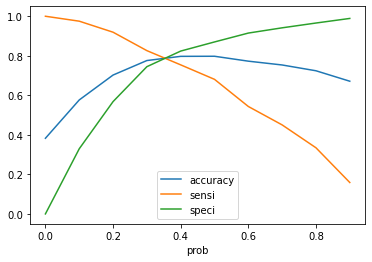

In [103]:
# Plotting accuracy, sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

Analysis of the above curve
Accuracy - Becomes stable after 0.35

Sensitivity - Decreases with the increased probablity.

Specificity - Increases with the increasing probablity.

At point 0.35 where the three parameters cut each other, we can see that there is a balance bethween sensitivity and specificity with a good accuracy.

So, 0.35 may be the optimal cutoff.

Predicted value with 0.35 probablity cutoff

In [105]:
# Creating a column with name "predicted", which is the predicted value for 0.35 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.896721,3825,1,1,1,1,1,1,1,1,1,0,1
1,1,0.864220,3307,1,1,1,1,1,1,1,1,1,0,1
2,0,0.063436,5527,1,0,0,0,0,0,0,0,0,0,0
3,1,0.534335,5180,1,1,1,1,1,1,0,0,0,0,1
4,1,0.632746,7064,1,1,1,1,1,1,1,0,0,0,1


#### Creating Lead Score

Creating a column called Lead Score by multplying the converted probablity with 100.

Lead Score = (Converted_Prob) X 100

In [107]:
# Creating Lead Score column
y_train_pred_final['Lead Score'] = round((y_train_pred_final['Converted_Prob']*100))
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted,Lead Score
0,0,0.896721,3825,1,1,1,1,1,1,1,1,1,0,1,90.0
1,1,0.864220,3307,1,1,1,1,1,1,1,1,1,0,1,86.0
2,0,0.063436,5527,1,0,0,0,0,0,0,0,0,0,0,6.0
3,1,0.534335,5180,1,1,1,1,1,1,0,0,0,0,1,53.0
4,1,0.632746,7064,1,1,1,1,1,1,1,0,0,0,1,63.0


The customers with Lead Score more than 35 will be converted as we decided to have the optimal probablity cutoff is 0.35.

Higher the Lead Score, higher the chance of the customers to be converted.

Finding the average Lead Score of the predicted converted leads

In [109]:
# Creating dataframe for predicted converted leads
y_train_pred_converted = y_train_pred_final[y_train_pred_final['predicted']==1]
y_train_pred_converted.head()

,Converted,Converted_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted,Lead Score
0,0,0.896721,3825,1,1,1,1,1,1,1,1,1,0,1,90.0
1,1,0.864220,3307,1,1,1,1,1,1,1,1,1,0,1,86.0
3,1,0.534335,5180,1,1,1,1,1,1,0,0,0,0,1,53.0
4,1,0.632746,7064,1,1,1,1,1,1,1,0,0,0,1,63.0
5,0,0.356839,6246,1,1,1,1,0,0,0,0,0,0,1,36.0


In [110]:
# Average Lead Score of the predicted converted leads
avg_converted = round(sum(y_train_pred_converted['Lead Score'])/len(y_train_pred_converted.index))
avg_converted

68

#### Finding the average Lead Score of the predicted not converted leads

In [111]:
# Creating dataframe for predicted not converted leads
y_train_pred_not_converted = y_train_pred_final[y_train_pred_final['predicted']==0]
y_train_pred_not_converted.head()

,Converted,Converted_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted,Lead Score
2,0,0.063436,5527,1,0,0,0,0,0,0,0,0,0,0,6.0
7,0,0.178858,6908,1,1,0,0,0,0,0,0,0,0,0,18.0
8,0,0.325882,4078,1,1,1,1,0,0,0,0,0,0,0,33.0
11,1,0.319800,4924,1,1,1,1,0,0,0,0,0,0,0,32.0
13,0,0.224798,993,1,1,1,0,0,0,0,0,0,0,0,22.0


In [112]:
# Average Lead Score of the predicted not converted leads
avg_not_converted = round(sum(y_train_pred_not_converted['Lead Score'])/len(y_train_pred_not_converted.index))
avg_not_converted

15

We can see that the average Lead Score of the customers, who were not converted is 15.

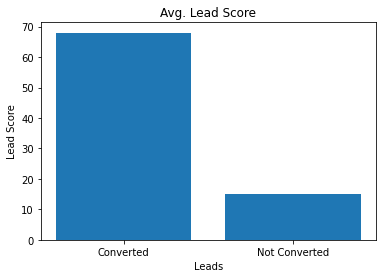

In [114]:
# Bar plot
plt.bar(['Converted', 'Not Converted'], [avg_converted, avg_not_converted])
plt.xlabel('Leads')
plt.ylabel('Lead Score')
plt.title('Avg. Lead Score')
plt.show()

In [115]:
# Importing metrics library
from sklearn import metrics

In [116]:
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'])
print(confusion)

[[3041  835]
 [ 499 1904]]


In [117]:
# Predicted        not_converted  converted
# Actual
# not_converted        3372          504
# converted            767           1636  

In [118]:
metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['predicted'])

0.7875457875457875

So using the confusion matrix, we got an accuracy of about 79%, which seems to be a good number.

In [119]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

##### Sensitivity (Number of correctly predicted YES)

In [120]:
# Let's see the sensitivity
TP / float(TP+FN)

0.7923429047024553

#### Specificity (Number of correctly predicted NOs)

In [121]:
# Let us calculate specificity
TN / float(TN+FP)

0.7845717234262126

##### False postive rate

In [122]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.2154282765737874


#### Positive predictive value

In [123]:
# positive predictive value 
print (TP / float(TP+FP))

0.6951442132165023


#### Negative predictive value

In [124]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8590395480225989


#### Analysis

So our model seems to have Good accuracy (~79%), Good specificity (~78%) and Good sensitivity (~79%).

### Plotting the ROC Curve (Trade off between sensitivity & specificity)

In [125]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [126]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'], drop_intermediate = False )


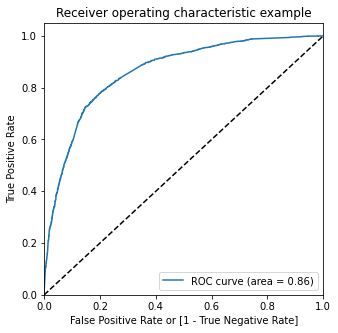

In [127]:
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

Gini of the model
We can see from the ROC curve, that the area of the curve is 0.86, which is the Gini of the model.

The curve is hugging the true positive rate axis.

#### Testing the model

##### Scaling the test set

We don't fit scaler on the test set. We only transform the test set.

In [128]:
# Transform the test set
X_test[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Email Bounced,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
341,0,0.285997,-0.044391,-0.153535,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
5449,0,-0.057167,0.924091,0.347591,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6360,0,0.972324,-0.394224,-0.554436,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5091,1,-0.057167,-0.440254,0.347591,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6311,0,-0.057167,-0.670407,0.347591,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [129]:
# Taking only the columns, which are selected in the train set
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website
341,0,-0.044391,0,1,0,0,0,0,0,0,0,1,0,0,0
5449,0,0.924091,0,1,0,0,0,0,0,0,0,1,0,0,0
6360,0,-0.394224,1,0,0,0,0,0,0,0,0,0,0,0,0
5091,1,-0.440254,0,1,0,0,0,0,0,0,0,0,0,0,0
6311,0,-0.670407,0,1,0,0,0,0,0,0,0,0,1,0,0


#### Statsmodel for the test set with the final model log_model_2

In [130]:
# Add constant
X_test_sm = sm.add_constant(X_test)

In [131]:
# Predictions on the test set with the final model log_model_2
y_test_pred = log_model_2.predict(X_test_sm)

In [132]:
y_test_pred.head()

341     0.274496
5449    0.529770
6360    0.346905
5091    0.160412
6311    0.072726
dtype: float64

In [133]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
341,0.274496
5449,0.529770
6360,0.346905
5091,0.160412
6311,0.072726


In [134]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
341,0
5449,0
6360,1
5091,0
6311,0


In [135]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

In [136]:
# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [137]:
# Appending y_pred_1 and y_test_df
y_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [138]:
y_pred_final.head()

,Converted,CustID,0
0,0,341,0.274496
1,0,5449,0.529770
2,1,6360,0.346905
3,0,5091,0.160412
4,0,6311,0.072726


In [139]:
# Renaming the '0' column as Converted probablity
y_pred_final = y_pred_final.rename(columns={0:'Converted_Prob'})

In [142]:
# Rearranging the columns 
y_pred_final = y_pred_final.reindex_axis(['CustID','Converted','Converted_Prob'], axis =1)

AttributeError: 'DataFrame' object has no attribute 'reindex_axis'

In [141]:
y_pred_final.head()

,Converted,CustID,Converted_Prob
0,0,341,0.274496
1,0,5449,0.529770
2,1,6360,0.346905
3,0,5091,0.160412
4,0,6311,0.072726


In [143]:
y_pred_final['test_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.35 else 0)

In [144]:
y_pred_final.head()

,Converted,CustID,Converted_Prob,test_predicted
0,0,341,0.274496,0
1,0,5449,0.529770,1
2,1,6360,0.346905,0
3,0,5091,0.160412,0
4,0,6311,0.072726,0


In [145]:
# Creating Lead Score column
y_pred_final['Lead Score'] = round((y_pred_final['Converted_Prob']*100))
y_pred_final.head()

,Converted,CustID,Converted_Prob,test_predicted,Lead Score
0,0,341,0.274496,0,27.0
1,0,5449,0.529770,1,53.0
2,1,6360,0.346905,0,35.0
3,0,5091,0.160412,0,16.0
4,0,6311,0.072726,0,7.0


The customers with Lead Score more than 35 will be converted as the probablity cutoff is 0.35.

Higher the Lead Score, higher the chance of the customers to be converted.

#### Confusion matrix

In [146]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['test_predicted'])
confusion2

array([[1334,  369],
       [ 208,  780]], dtype=int64)

In [147]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

#### Accuracy

In [148]:
# Let's check the overall accuracy of the test set
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final['test_predicted'])

0.7855815681902638

#### Sensitivity

In [149]:
# Sensitivity of the test set
TP / float(TP+FN)

0.7894736842105263

#### Sepcificity

In [150]:
# Specificity for the test set
TN / float(TN+FP)

0.7833235466823253

#### Conclusion